In [11]:
import pandas as pd

# Analisis de chistes textuales

In [ ]:
chistes_tomas = pd.read_csv("data/textos/chistes_clasificados/clasificacion_chistes.csv")
chistes_gotty = pd.read_csv("data/textos/chistes_clasificados/clasificacion_chistes_gotty.csv")
chistes_santi = pd.read_csv("data/textos/chistes_clasificados/clasificacion_chistes_santi.csv")

In [13]:
chistes_tomas.drop(columns=["label"],inplace=True)
chistes_tomas

,id,Chistes,nivel_risa
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...,0
1,2008,Sabes por qué los hospitales tienen refrigerac...,2
2,2009,Cual es la fruta más chistosa? La naranjajajaj...,3
3,2010,Cuanta leche da la vaca en su vida? La misma q...,0
4,2011,when estornudas: A CHU,0
...,...,...,...
8103,10110,¿Por qué los franceses comen caracoles?\n Por...,4
8104,10111,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1
8105,10112,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2
8106,10113,¿Por qué está tan feliz siempre la escoba?\n ...,2


In [ ]:

chistes_gotty.rename(columns={"nivel_risa": "nivel_risa2"}, inplace=True)
chistes_gotty.drop(columns=["label"],inplace=True)

In [15]:
chistes_santi.rename(columns={"nivel_risa": "nivel_risa3"}, inplace=True)
chistes_santi.drop(columns=["label"],inplace=True)
chistes_santi

,id,Chistes,nivel_risa3
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...,2
1,2008,Sabes por qué los hospitales tienen refrigerac...,4
2,2009,Cual es la fruta más chistosa? La naranjajajaj...,2
3,2010,Cuanta leche da la vaca en su vida? La misma q...,2
4,2011,when estornudas: A CHU,5
...,...,...,...
8103,10110,¿Por qué los franceses comen caracoles?\n Por...,4
8104,10111,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1
8105,10112,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2
8106,10113,¿Por qué está tan feliz siempre la escoba?\n ...,2


In [16]:
merged_df = chistes_tomas.merge(chistes_gotty[['id', 'nivel_risa2']], on='id', how='inner')
merged_df = merged_df.merge(chistes_santi[['id', 'nivel_risa3']], on='id', how='inner')
merged_df

,id,Chistes,nivel_risa,nivel_risa2,nivel_risa3
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...,0,2,2
1,2008,Sabes por qué los hospitales tienen refrigerac...,2,1,4
2,2009,Cual es la fruta más chistosa? La naranjajajaj...,3,4,2
3,2010,Cuanta leche da la vaca en su vida? La misma q...,0,1,2
4,2011,when estornudas: A CHU,0,5,5
...,...,...,...,...,...
8103,10110,¿Por qué los franceses comen caracoles?\n Por...,4,2,4
8104,10111,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1,1,1
8105,10112,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2,1,2
8106,10113,¿Por qué está tan feliz siempre la escoba?\n ...,2,1,2


verificar distribucion datos

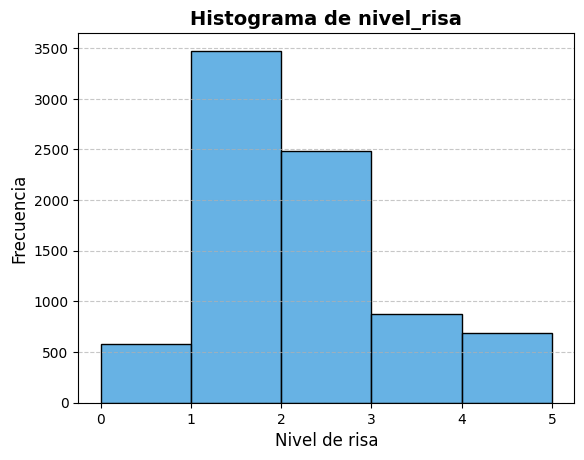

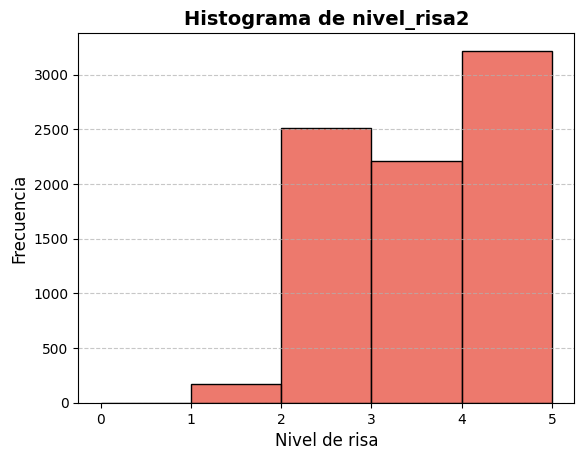

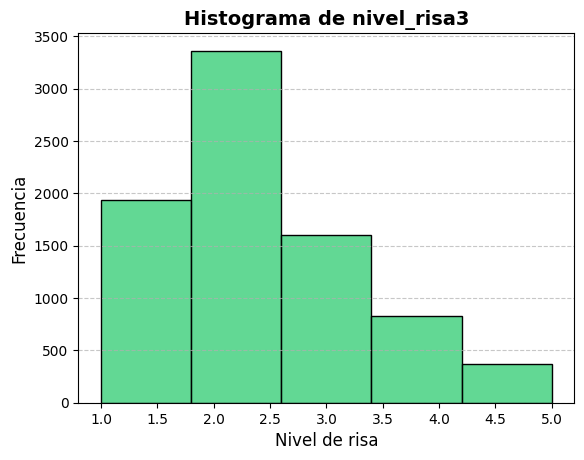

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de colores personalizados para cada nivel de risa
colors = ["#3498db", "#e74c3c", "#2ecc71"]

# Crear histogramas para cada nivel de risa usando seaborn con colores personalizados
for i, column in enumerate(['nivel_risa', 'nivel_risa2', 'nivel_risa3']):
    plt.figure()
    sns.histplot(merged_df[column], bins=5, kde=False, color=colors[i], edgecolor="black")
    plt.title(f'Histograma de {column}', fontsize=14, fontweight='bold')
    plt.xlabel('Nivel de risa', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


verificar que solo tiene risa el chiste cuando 2 personas coinciden que es chistoso

In [23]:
import math
import pandas as pd

def calcular_nivel_risa_conjunto(df):
    def promedio_risa(row):
        niveles = [row['nivel_risa'], row['nivel_risa2'], row['nivel_risa3']]
        valores_no_cero = [nivel for nivel in niveles if nivel > 0]
        
        # Condición 1: Solo se promedian si al menos 2 de los niveles son mayores a 0
        if len(valores_no_cero) >= 2:
            # Calcula el promedio
            promedio = sum(valores_no_cero) / len(valores_no_cero)
            
            # Redondeo considerando la votación mayoritaria
            if promedio % 1 == 0.5:
                # Si el promedio es .5, elige el valor que más se repite entre los niveles
                return max(set(valores_no_cero), key=valores_no_cero.count)
            else:
                return round(promedio)  # Redondeo normal en otros casos
        else:
            return 0  # Si no cumple la condición, devuelve 0

    # Aplica la función a cada fila y crea la nueva columna 'nivel_risa_conjunto'
    df['nivel_risa_conjunto'] = df.apply(promedio_risa, axis=1)
    return df

# Ejemplo de uso
# df es tu DataFrame original con las columnas 'nivel_risa', 'nivel_risa2', y 'nivel_risa3'
merged_df = calcular_nivel_risa_conjunto(merged_df)


In [24]:
merged_df

,id,Chistes,nivel_risa,nivel_risa2,nivel_risa3,nivel_risa_conjunto
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...,0,2,2,2
1,2008,Sabes por qué los hospitales tienen refrigerac...,2,1,4,2
2,2009,Cual es la fruta más chistosa? La naranjajajaj...,3,4,2,3
3,2010,Cuanta leche da la vaca en su vida? La misma q...,0,1,2,1
4,2011,when estornudas: A CHU,0,5,5,5
...,...,...,...,...,...,...
8103,10110,¿Por qué los franceses comen caracoles?\n Por...,4,2,4,3
8104,10111,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1,1,1,1
8105,10112,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2,1,2,2
8106,10113,¿Por qué está tan feliz siempre la escoba?\n ...,2,1,2,2


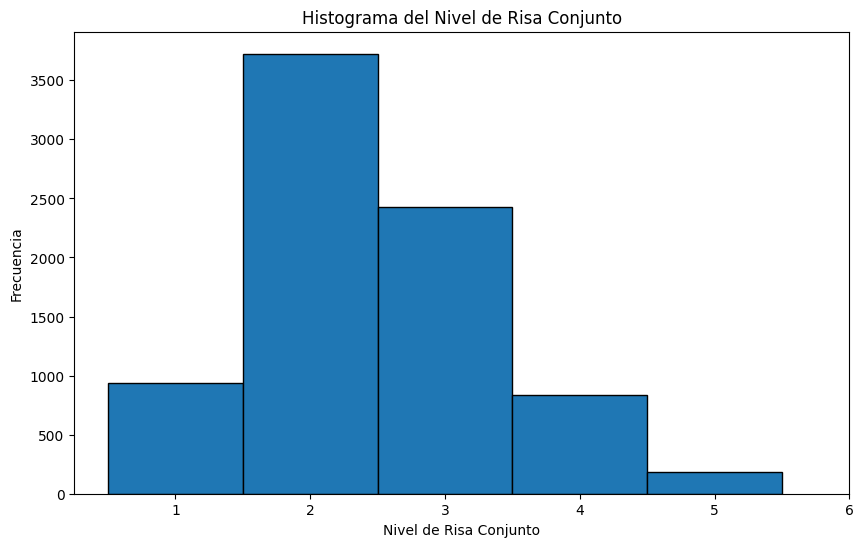

In [25]:
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['nivel_risa_conjunto'], bins=range(1, 7), edgecolor='black', align='left')
    plt.xlabel('Nivel de Risa Conjunto')
    plt.ylabel('Frecuencia')
    plt.title('Histograma del Nivel de Risa Conjunto')
    plt.xticks(range(1, 7))
    plt.show()

plot_histogram(merged_df)

eliminar los ids de los duplicados obtenidos del otro notebook

In [26]:
data = """
2045 2053
2301 2348
2083 2336
2841 2956
3073 3074
3088 3391
3091 3249 3234 3109
3121 3124
3130 3131 3132
3184 3185 3208 3185
3233 3283 3186
3210 3211
3250 3251
3258 3261
3315 3366
3519 3592
3596 3730 3799 3894
3598 3843
3704 4006
3705 3720
3713 3719
3748 3989
3757 3990
3769 4005
3775 4003
3778 4002
3779 4001
3783 4000
3784 3999
3785 3998
3786 3997
3787 3995
3788 3994
3790 3993
3791 3992
3793 3991
4332 4335
4032 4447
4032 4234
4370 4390
4654 4712
4658 4676
5554 5960
6066 6101
6069 6306
6097 6450
6145 6207
6296 6402
6381 6500
6424 6503
6558 6977
6584 6950
6683 6684
7116 7204
7332 7398
7083 7206
7155 7156
7195 7254
7277 7368
6507 6719
6515 6929
6583 6948
6635 6775
7540 7541
7550 7803
7629 7825
7641 7946
7889 7968
7977 7992
7982 8002
8464 8483
8114 8284
8066 8305
8553 8658
8557 8653
8567 8724  8584
3844 3848
8573 8577
8626 8671
3904 3956
8653 8758
3899 3942
4682 4704
4683 4717
4713 4721
4793 4799
8797 8802
8799 8803
8879 8883
8992 9000 9043 9155
9015 9091
9052 9140 9227
9075 9371
9100 9394
9136 9318
9176 9240 9348
9191 9228
9203 9340
9214 9487
9219 9357
9220 9352
9302 9330
9553 9568
9563 9999
9588 9672
9590 9609 9652 9718
9592 9662
9593 9623 9669 9683
9594 9638
9595 9671
9596 9673
9596 9689
9597 9656
9602 9674
9604 9694
9606 9658
9587 9641 9650 9702
9606 9670
9610 9696
9611 9697
9612 9698
9613 9642
9615 9688
9617 9653
9617 9717 9653
9618 9708
9620 9675
9620 9709
9621 9640
9624 9711
9626 9712
9629 9713
9630 9714
9631 9715
9632 9706
9633 9707
9636 9716
9645 9685
9647 9678
9649 9695
9654 9699
9655 9703
9673 9689
9675 9709
9681 9691
9843 9988
9863 9942
9963 9965
9191 9228
9203 9340
9214 9487
9219 9357
9220 9352
9240 9348
9302 9330
9303 9312
9303 9321
9308 9434
9312 9321
9313 9396 9462
9314 9381
9315 9343
9342 9450
9344 9472
9354 9390
9355 9418
9358 9478
9364 9447
9366 9420
9370 9488
9373 9442
9393 9485
9396 9462
9409 9473 9486
9413 9444
9428 9471
"""

# Parse the data to create the dictionary
data_dict = {}
for line in data.strip().split("\n"):
    numbers = list(map(int, line.split()))
    data_dict[numbers[0]] = numbers[1:]

unicos = []
for k,v in data_dict.items():
    for i in v:
        if i not in unicos:
            unicos.append(i)

unicos

[2053,
 2348,
 2336,
 2956,
 3074,
 3391,
 3249,
 3234,
 3109,
 3124,
 3131,
 3132,
 3185,
 3208,
 3283,
 3186,
 3211,
 3251,
 3261,
 3366,
 3592,
 3730,
 3799,
 3894,
 3843,
 4006,
 3720,
 3719,
 3989,
 3990,
 4005,
 4003,
 4002,
 4001,
 4000,
 3999,
 3998,
 3997,
 3995,
 3994,
 3993,
 3992,
 3991,
 4335,
 4234,
 4390,
 4712,
 4676,
 5960,
 6101,
 6306,
 6450,
 6207,
 6402,
 6500,
 6503,
 6977,
 6950,
 6684,
 7204,
 7398,
 7206,
 7156,
 7254,
 7368,
 6719,
 6929,
 6948,
 6775,
 7541,
 7803,
 7825,
 7946,
 7968,
 7992,
 8002,
 8483,
 8284,
 8305,
 8658,
 8653,
 8724,
 8584,
 3848,
 8577,
 8671,
 3956,
 8758,
 3942,
 4704,
 4717,
 4721,
 4799,
 8802,
 8803,
 8883,
 9000,
 9043,
 9155,
 9091,
 9140,
 9227,
 9371,
 9394,
 9318,
 9240,
 9348,
 9228,
 9340,
 9487,
 9357,
 9352,
 9330,
 9568,
 9999,
 9672,
 9609,
 9652,
 9718,
 9662,
 9623,
 9669,
 9683,
 9638,
 9671,
 9689,
 9656,
 9674,
 9694,
 9670,
 9641,
 9650,
 9702,
 9696,
 9697,
 9698,
 9642,
 9688,
 9717,
 9653,
 9708,
 9709,
 9640,

In [27]:
merged_df = merged_df[~merged_df['id'].isin(unicos)]


In [28]:
merged_df.shape

(7928, 6)

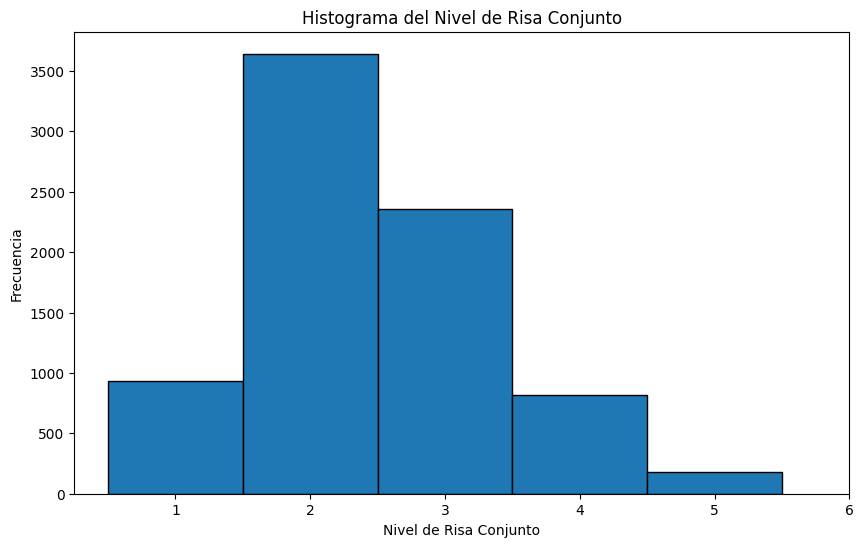

In [29]:
def plot_histogram(df):
    plt.figure(figsize=(10, 6))
    plt.hist(df['nivel_risa_conjunto'], bins=range(1, 7), edgecolor='black', align='left')
    plt.xlabel('Nivel de Risa Conjunto')
    plt.ylabel('Frecuencia')
    plt.title('Histograma del Nivel de Risa Conjunto')
    plt.xticks(range(1, 7))
    plt.show()

plot_histogram(merged_df)

In [32]:
merged_df.reset_index().drop(columns=["index"],inplace=True)
merged_df

,id,Chistes,nivel_risa,nivel_risa2,nivel_risa3,nivel_risa_conjunto
0,2007,¿Por qué la gallina cruzo la calle?: Para esta...,0,2,2,2
1,2008,Sabes por qué los hospitales tienen refrigerac...,2,1,4,2
2,2009,Cual es la fruta más chistosa? La naranjajajaj...,3,4,2,3
3,2010,Cuanta leche da la vaca en su vida? La misma q...,0,1,2,1
4,2011,when estornudas: A CHU,0,5,5,5
...,...,...,...,...,...,...
8103,10110,¿Por qué los franceses comen caracoles?\n Por...,4,2,4,3
8104,10111,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1,1,1,1
8105,10112,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2,1,2,2
8106,10113,¿Por qué está tan feliz siempre la escoba?\n ...,2,1,2,2


In [ ]:
merged_df["id"] = range(2190, 2190 + merged_df.shape[0])


C:\Users\acost\AppData\Local\Temp\ipykernel_18152\1811714935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df["id"] = range(2190, 2190 + merged_df.shape[0])


,id,Chistes,nivel_risa,nivel_risa2,nivel_risa3,nivel_risa_conjunto
0,2190,¿Por qué la gallina cruzo la calle?: Para esta...,0,2,2,2
1,2191,Sabes por qué los hospitales tienen refrigerac...,2,1,4,2
2,2192,Cual es la fruta más chistosa? La naranjajajaj...,3,4,2,3
3,2193,Cuanta leche da la vaca en su vida? La misma q...,0,1,2,1
4,2194,when estornudas: A CHU,0,5,5,5
...,...,...,...,...,...,...
8103,10113,¿Por qué los franceses comen caracoles?\n Por...,4,2,4,3
8104,10114,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1,1,1,1
8105,10115,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2,1,2,2
8106,10116,¿Por qué está tan feliz siempre la escoba?\n ...,2,1,2,2


In [50]:
merged_df.loc[merged_df["nivel_risa_conjunto"]==0]

,id,Chistes,nivel_risa_conjunto


In [37]:
merged_df.drop(columns=["nivel_risa","nivel_risa2","nivel_risa3"],inplace=True)

C:\Users\acost\AppData\Local\Temp\ipykernel_18152\273252134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(columns=["nivel_risa","nivel_risa2","nivel_risa3"],inplace=True)


In [38]:
merged_df

,id,Chistes,nivel_risa_conjunto
0,2190,¿Por qué la gallina cruzo la calle?: Para esta...,2
1,2191,Sabes por qué los hospitales tienen refrigerac...,2
2,2192,Cual es la fruta más chistosa? La naranjajajaj...,3
3,2193,Cuanta leche da la vaca en su vida? La misma q...,1
4,2194,when estornudas: A CHU,5
...,...,...,...
8103,10113,¿Por qué los franceses comen caracoles?\n Por...,3
8104,10114,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1
8105,10115,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2
8106,10116,¿Por qué está tan feliz siempre la escoba?\n ...,2


# Analisis datos de memes

In [39]:
memes_tomas = pd.read_csv("data/textos/chistes_clasificados/clasificacion_memes.csv")
memes_gotty = pd.read_csv("data/textos/chistes_clasificados/clasificacion_memes_gotty.csv")
memes_santi = pd.read_csv("data/textos/chistes_clasificados/clasificacion_memes_santi.csv")

In [41]:
memes_tomas.drop(columns=["label"],inplace=True)
memes_gotty.rename(columns={"nivel_risa": "nivel_risa2"}, inplace=True)
memes_gotty.drop(columns=["label"],inplace=True)
memes_santi.rename(columns={"nivel_risa": "nivel_risa3"}, inplace=True)
memes_santi.drop(columns=["label"],inplace=True)

In [42]:
merged_memes_df = memes_tomas.merge(memes_gotty[['id', 'nivel_risa2']], on='id', how='inner')
merged_memes_df = merged_memes_df.merge(memes_santi[['id', 'nivel_risa3']], on='id', how='inner')
merged_memes_df

,id,descripcion,nivel_risa,nivel_risa2,nivel_risa3
0,1,1.png,4,5,3
1,2,2.png,0,1,3
2,3,3.png,3,2,4
3,4,4.jpeg,1,3,4
4,5,5.jpeg,0,2,3
...,...,...,...,...,...
2184,2185,2185.jpeg,2,1,3
2185,2186,2186.jpeg,3,1,4
2186,2187,2187.jpeg,2,2,4
2187,2188,2188.jpeg,3,3,3


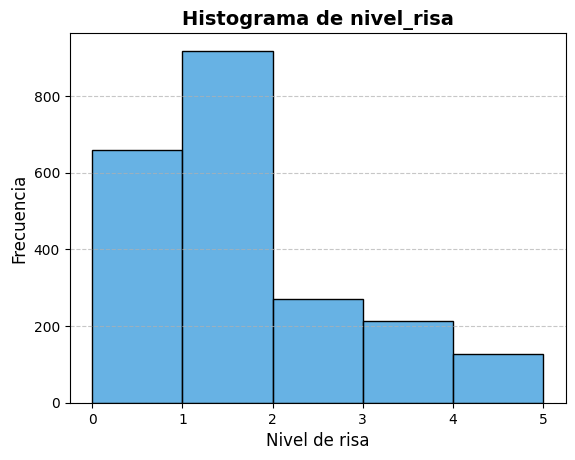

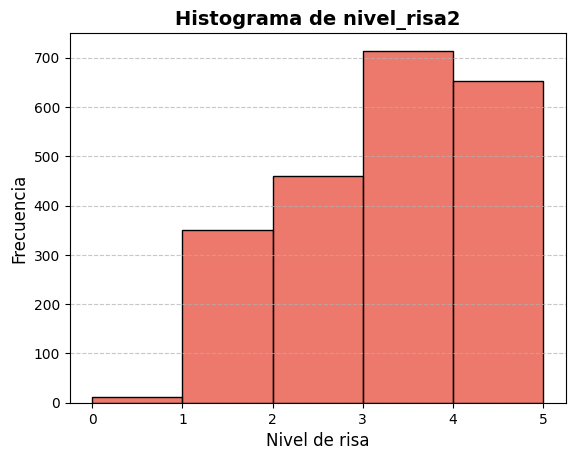

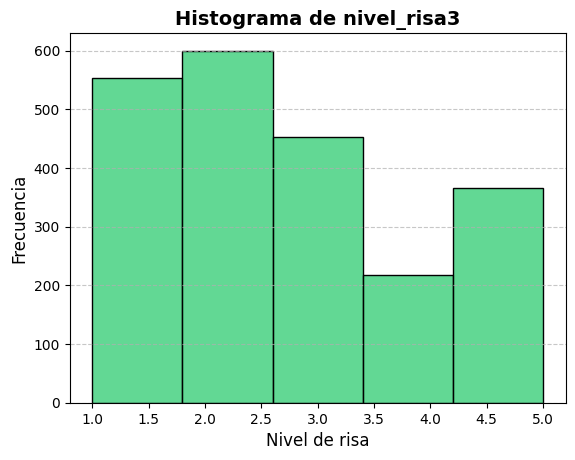

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de colores personalizados para cada nivel de risa
colors = ["#3498db", "#e74c3c", "#2ecc71"]

# Crear histogramas para cada nivel de risa usando seaborn con colores personalizados
for i, column in enumerate(['nivel_risa', 'nivel_risa2', 'nivel_risa3']):
    plt.figure()
    sns.histplot(merged_memes_df[column], bins=5, kde=False, color=colors[i], edgecolor="black")
    plt.title(f'Histograma de {column}', fontsize=14, fontweight='bold')
    plt.xlabel('Nivel de risa', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [46]:

merged_memes_df = calcular_nivel_risa_conjunto(merged_memes_df)


In [47]:
merged_memes_df

,id,descripcion,nivel_risa,nivel_risa2,nivel_risa3,nivel_risa_conjunto
0,1,1.png,4,5,3,4
1,2,2.png,0,1,3,2
2,3,3.png,3,2,4,3
3,4,4.jpeg,1,3,4,3
4,5,5.jpeg,0,2,3,2
...,...,...,...,...,...,...
2184,2185,2185.jpeg,2,1,3,2
2185,2186,2186.jpeg,3,1,4,3
2186,2187,2187.jpeg,2,2,4,3
2187,2188,2188.jpeg,3,3,3,3


In [49]:
merged_memes_df.loc[merged_memes_df["nivel_risa_conjunto"]==0]

,id,descripcion,nivel_risa,nivel_risa2,nivel_risa3,nivel_risa_conjunto
25,26,26.jpeg,0,0,1,0
109,110,110.jpeg,0,0,2,0
117,118,118.jpeg,0,0,3,0
118,119,119.jpeg,0,0,4,0
133,134,134.jpeg,0,0,3,0
136,137,137.jpeg,0,0,1,0
140,141,141.jpeg,0,0,1,0
143,144,144.jpeg,0,0,3,0
152,153,153.jpeg,0,0,2,0
175,176,176.jpeg,0,0,2,0


Ademas agregamos el id 1497 porque esta duplicado

In [51]:
memes_sin_humor = [26,110,118,119,134,137,141,144,153,176,253,1497]

In [53]:
merged_memes_df = merged_memes_df[~merged_memes_df['id'].isin(memes_sin_humor)]


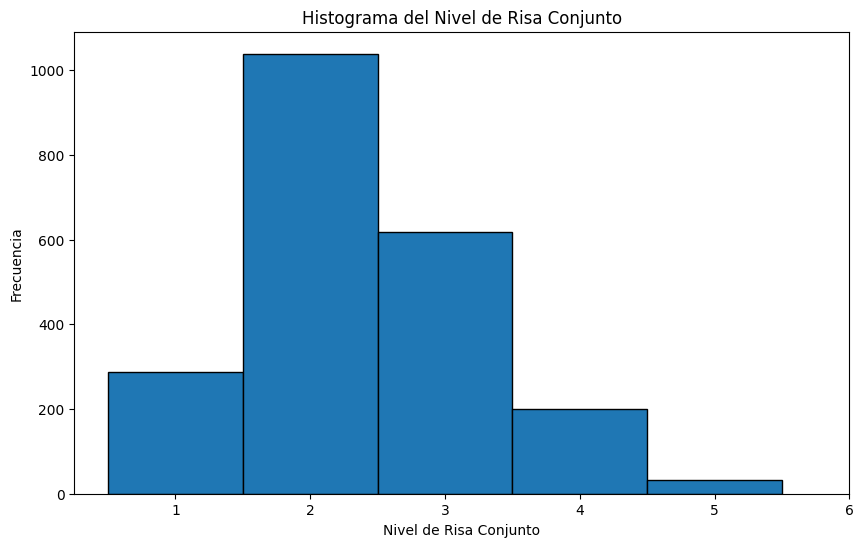

In [54]:
plot_histogram(merged_memes_df)

In [55]:
merged_memes_df.loc[merged_memes_df["nivel_risa_conjunto"]==0]

,id,descripcion,nivel_risa,nivel_risa2,nivel_risa3,nivel_risa_conjunto


In [60]:
merged_memes_df.drop(columns=['nivel_risa','nivel_risa2','nivel_risa3'],inplace=True)

C:\Users\acost\AppData\Local\Temp\ipykernel_18152\3636484815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_memes_df.drop(columns=['nivel_risa','nivel_risa2','nivel_risa3'],inplace=True)


In [67]:
merged_memes_df.rename(columns={"descripcion":"Chistes"},inplace=True)

C:\Users\acost\AppData\Local\Temp\ipykernel_18152\784266735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_memes_df.rename(columns={"descripcion":"Chistes"},inplace=True)


# Union dfs

Ahora si podemos unir los resultados de ambos en un df resultante

In [68]:
merged_df

,id,Chistes,nivel_risa_conjunto
0,2190,¿Por qué la gallina cruzo la calle?: Para esta...,2
1,2191,Sabes por qué los hospitales tienen refrigerac...,2
2,2192,Cual es la fruta más chistosa? La naranjajajaj...,3
3,2193,Cuanta leche da la vaca en su vida? La misma q...,1
4,2194,when estornudas: A CHU,5
...,...,...,...
8103,10113,¿Por qué los franceses comen caracoles?\n Por...,3
8104,10114,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1
8105,10115,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2
8106,10116,¿Por qué está tan feliz siempre la escoba?\n ...,2


In [69]:
merged_memes_df

,id,Chistes,nivel_risa_conjunto
0,1,1.png,4
1,2,2.png,2
2,3,3.png,3
3,4,4.jpeg,3
4,5,5.jpeg,2
...,...,...,...
2184,2185,2185.jpeg,2
2185,2186,2186.jpeg,3
2186,2187,2187.jpeg,3
2187,2188,2188.jpeg,3


In [79]:
df_chistes = pd.concat([merged_memes_df,merged_df],ignore_index=True)

In [80]:
df_chistes.sort_values(by='id').reset_index(drop=True)
df_chistes

,id,Chistes,nivel_risa_conjunto
0,1,1.png,4
1,2,2.png,2
2,3,3.png,3
3,4,4.jpeg,3
4,5,5.jpeg,2
...,...,...,...
10100,10113,¿Por qué los franceses comen caracoles?\n Por...,3
10101,10114,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1
10102,10115,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2
10103,10116,¿Por qué está tan feliz siempre la escoba?\n ...,2


In [83]:
df_chistes.rename(columns={"id":"id_chiste","nivel_risa_conjunto":"nivel_risa"},inplace=True)
df_chistes

,id_chiste,Chistes,nivel_risa
0,1,1.png,4
1,2,2.png,2
2,3,3.png,3
3,4,4.jpeg,3
4,5,5.jpeg,2
...,...,...,...
10100,10113,¿Por qué los franceses comen caracoles?\n Por...,3
10101,10114,¿Qué le dice el 1 al 10?\n Para ser como yo d...,1
10102,10115,¿Sabes qué le dice una piedra a otra?\n ¡La v...,2
10103,10116,¿Por qué está tan feliz siempre la escoba?\n ...,2


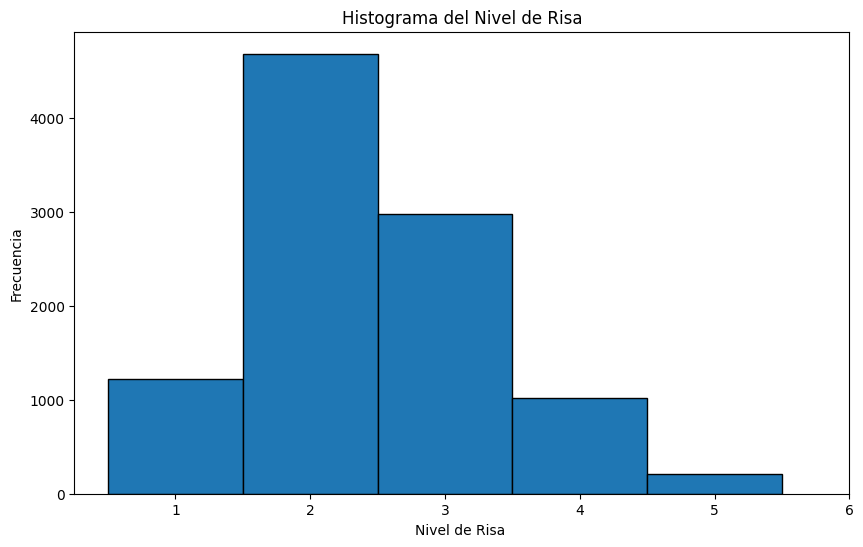

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_chistes['nivel_risa'], bins=range(1, 7), edgecolor='black', align='left')
plt.xlabel('Nivel de Risa ')
plt.ylabel('Frecuencia')
plt.title('Histograma del Nivel de Risa Conjunto')
plt.xticks(range(1, 7))
plt.show()

In [86]:
df_chistes['nivel_risa'].value_counts().sort_index()

nivel_risa
1    1217
2    4681
3    2973
4    1021
5     213
Name: count, dtype: int64

In [97]:
df_chistes.to_csv("data/textos/chistes_clasificados/chistes_y_memes_clasificados_completos.csv",index=False)

In [111]:
chistes_generados = pd.read_excel("data/textos/no_unificado/chistes_generados_procesados.xlsx")
chistes_antes_gotty = pd.read_excel("data/textos/no_unificado/chistes_gotty.xlsx")
chistes_antes_santi = pd.read_csv("data/textos/no_unificado/chistes_santi.csv", sep=';')
dataset_antes = pd.read_csv("data/textos/no_unificado/dataset_licenses_text.csv")

In [112]:
dataset_antes.rename(columns={"text":"Chistes"},inplace=True)

In [113]:
import pandas as pd


# Lista de archivos con nombres descriptivos
files = {
    "chistes_generados": chistes_generados,
    "chistes_antes_gotty": chistes_antes_gotty,
    "chistes_antes_santi": chistes_antes_santi,
    "dataset_antes": dataset_antes
}

# Crear un diccionario para almacenar los resultados
results = {}

for name, df in files.items():
    # Filtrar los chistes que están en df_chistes y tienen asignado un nivel de risa
    merged_df = df.merge(df_chistes[['Chistes', 'nivel_risa']], on='Chistes', how='inner')
    
    # Contar el total de chistes y el porcentaje de cada nivel de risa
    total_chistes = merged_df.shape[0]
    risa_counts = merged_df['nivel_risa'].value_counts(normalize=True).sort_index() * 100
    
    # Almacenar el resultado en el diccionario
    results[name] = {f"Nivel {i}": f"{risa_counts.get(i, 0):.2f}%" for i in range(1, 6)}
    results[name]["Total chistes"] = total_chistes

# Mostrar los resultados
for name, levels in results.items():
    print(f"\nResultados para {name}:")
    for level, percentage in levels.items():
        print(f"{level}: {percentage}")



Resultados para chistes_generados:
Nivel 1: 38.76%
Nivel 2: 58.33%
Nivel 3: 2.91%
Nivel 4: 0.00%
Nivel 5: 0.00%
Total chistes: 1992

Resultados para chistes_antes_gotty:
Nivel 1: 1.02%
Nivel 2: 36.08%
Nivel 3: 51.93%
Nivel 4: 10.77%
Nivel 5: 0.20%
Total chistes: 984

Resultados para chistes_antes_santi:
Nivel 1: 10.32%
Nivel 2: 21.24%
Nivel 3: 36.37%
Nivel 4: 27.15%
Nivel 5: 4.91%
Total chistes: 998

Resultados para dataset_antes:
Nivel 1: 1.04%
Nivel 2: 61.30%
Nivel 3: 36.63%
Nivel 4: 1.04%
Nivel 5: 0.00%
Total chistes: 4816


In [117]:
import pandas as pd

# Filtrar solo las filas donde la columna 'Chistes' contiene archivos de imagen (.png o .jpeg)
df_imagenes = df_chistes[df_chistes['Chistes'].str.endswith(('.png', '.jpeg'))]

# Contar el total de imágenes y el porcentaje de cada nivel de risa
total_imagenes = df_imagenes.shape[0]
risa_counts = df_imagenes['nivel_risa'].value_counts(normalize=True).sort_index() * 100

# Presentar resultados
print(f"Total de imágenes procesadas: {total_imagenes}")
for level in range(1, 6):
    percentage = risa_counts.get(level, 0)
    print(f"Nivel {level}: {percentage:.2f}%")


Total de imágenes procesadas: 2177
Nivel 1: 13.18%
Nivel 2: 47.73%
Nivel 3: 28.43%
Nivel 4: 9.19%
Nivel 5: 1.47%
